# 라이브러리 설정

In [1]:
# 한글 폰트 설정

import sys
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    !sudo apt-get -qq -y install fonts-nanum



    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    for fpath in font_files:
        fm.fontManager.addfont(fpath)

In [2]:
# 기본 라이브러리 임포트
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

# 데이터 전처리

In [18]:
# sklearn 라이브러리에서 와인 데이터셋 로드
from sklearn.datasets import load_wine
wine = load_wine()

X = wine.data
y = wine.target

print(X.shape, y.shape)
print(y)

(178, 13) (178,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
# 타겟을 원-핫 인코딩으로 변환
y = to_categorical(y)

print(y.shape)
print(y)

(178, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1.

In [10]:
# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train[:3]

array([[1.434e+01, 1.680e+00, 2.700e+00, 2.500e+01, 9.800e+01, 2.800e+00,
        1.310e+00, 5.300e-01, 2.700e+00, 1.300e+01, 5.700e-01, 1.960e+00,
        6.600e+02],
       [1.253e+01, 5.510e+00, 2.640e+00, 2.500e+01, 9.600e+01, 1.790e+00,
        6.000e-01, 6.300e-01, 1.100e+00, 5.000e+00, 8.200e-01, 1.690e+00,
        5.150e+02],
       [1.237e+01, 1.070e+00, 2.100e+00, 1.850e+01, 8.800e+01, 3.520e+00,
        3.750e+00, 2.400e-01, 1.950e+00, 4.500e+00, 1.040e+00, 2.770e+00,
        6.600e+02]])

In [6]:
y_train[:3]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [7]:
# 데이터 정규화 (평균 0, 표준편차 1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train[:3]

array([[ 1.66529275, -0.60840587,  1.21896194,  1.60540017, -0.16738426,
         0.80400157, -0.6916784 ,  1.26722552,  1.8775398 ,  3.41947305,
        -1.65632857, -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502,  1.60540017, -0.30437887,
        -0.78538376, -1.40123291,  2.04959953, -0.87350523, -0.0248012 ,
        -0.58463272, -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, -0.28270426, -0.8523573 ,
         1.93702874,  1.7467906 , -1.00165913,  0.58798744, -0.24006834,
         0.35845962,  0.2462267 , -0.24860607]])

# 모델 학습 및 평가

In [13]:
# 모델 정의
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# 모델 요약 출력
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 64)                  │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,131 (16.14 KB)

 Trainable params: 4,131 (16.14 KB)

 Non-trainable params: 0 (0.00 B)

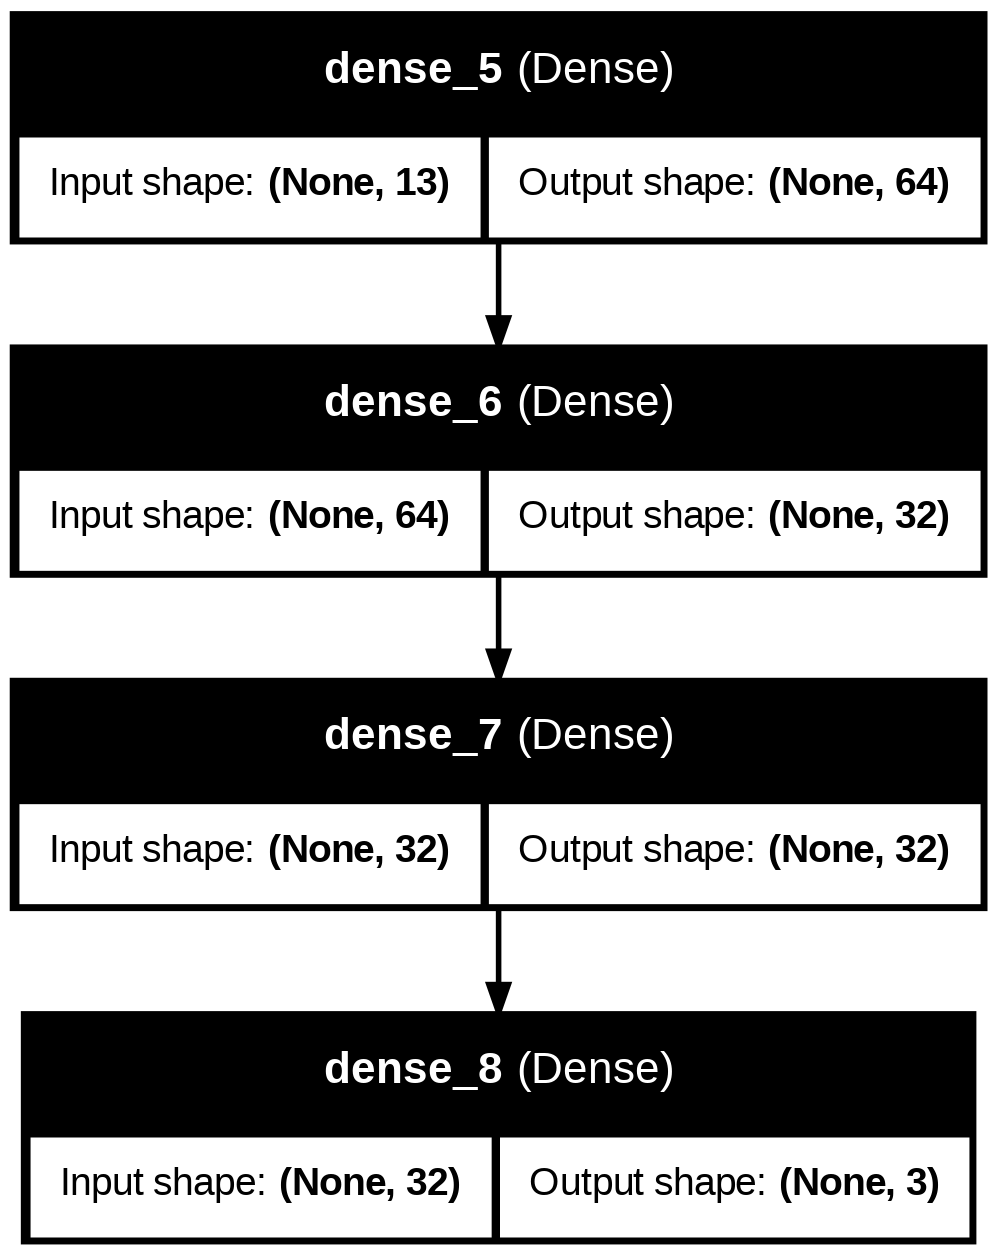

In [14]:
# 모델 구조 시각화
plot_model(model, show_shapes=True, show_layer_names=True)

In [8]:
# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.4986 - loss: 1.0759 - val_accuracy: 0.5517 - val_loss: 0.9726
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6763 - loss: 0.9254 - val_accuracy: 0.6552 - val_loss: 0.8766
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6668 - loss: 0.8689 - val_accuracy: 0.8276 - val_loss: 0.7800
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7410 - loss: 0.7510 - val_accuracy: 0.8966 - val_loss: 0.6861
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8839 - loss: 0.6536 - val_accuracy: 0.9310 - val_loss: 0.5898
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9409 - loss: 0.5323 - val_accuracy: 0.9310 - val_loss: 0.4841
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9444 - loss: 0.4389 - val_accuracy: 0.9655 - val_loss: 0.3816
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9800 - loss: 0.3510 - val_accuracy: 0.9655 - val_loss: 0.2948


In [9]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"테스트 세트의 정확도: {accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 1.0000 - loss: 0.0078
테스트 세트의 정확도: 1.0


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


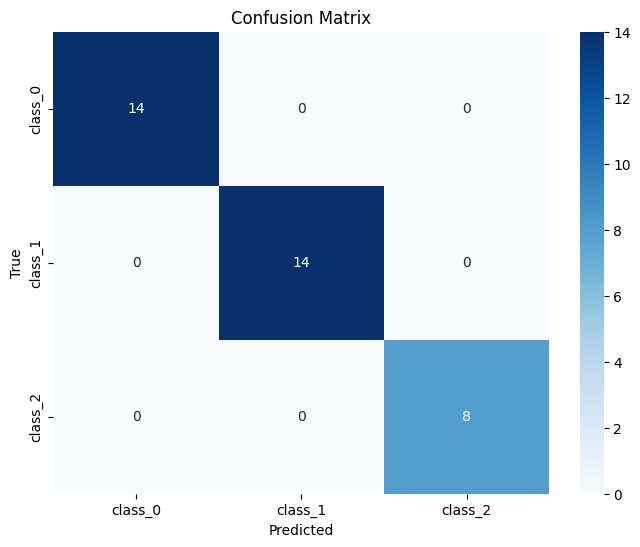

In [10]:
# 예측
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 혼동 행렬 시각화
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()